<a href="https://colab.research.google.com/github/hissa02/Atividade-de-Grafos-Algoritmo-/blob/main/Atividade_de_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#	🔷**Grafo** **Delaunay**



---


## 	📘O que é um grafo de Delaunay?
A triangulação de Delaunay é uma maneira de conectar um conjunto de pontos no plano de modo que nenhum ponto fique dentro do círculo circunscrito de qualquer triângulo formado. Em outras palavras, ela busca gerar triângulos “bons”, evitando ângulos muito agudos.

Essa técnica é amplamente utilizada em gráficos computacionais, modelagem de terrenos, malhas para elementos finitos, entre outras aplicações.

Um grafo de Delaunay é a representação gráfica dessa triangulação: os vértices são os pontos fornecidos, e as arestas conectam pontos vizinhos que formam triângulos válidos segundo a regra de Delaunay.

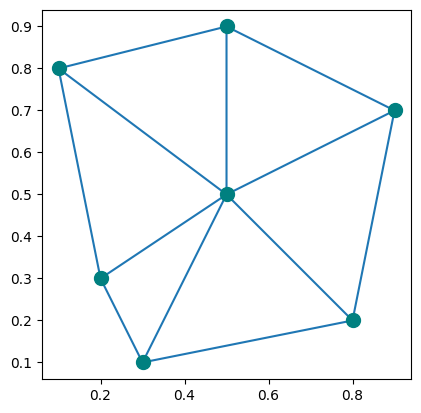

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay

# Pontos específicos para formar estrutura
points = np.array([[0.2,0.3], [0.8,0.2], [0.9,0.7], [0.5,0.9], [0.1,0.8], [0.5,0.5], [0.3,0.1]])

# Triangulação e plot
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', color='teal', markersize=10)
plt.gca().set_aspect('equal')
plt.show()



---


##🧪 Descrição do grafo gerado

O código em Python apresentado utiliza bibliotecas como NumPy, Matplotlib e SciPy para gerar e visualizar um grafo de Delaunay. O processo foi dividido em três partes principais:

##1.	Geração dos pontos:

In [ ]:
points = np.array([[0.2,0.3], [0.8,0.2], [0.9,0.7], [0.5,0.9], [0.1,0.8], [0.5,0.5], [0.3,0.1]])

Aqui são definidos manualmente 7 pontos específicos no espaço bidimensional, com coordenadas entre 0 e 1. Esses pontos foram escolhidos para formar uma estrutura visualmente mais clara e controlada, facilitando a observação da triangulação.

##2.	Construção da triangulação de Delaunay:

In [ ]:
tri = Delaunay(points)

Essa linha aplica o algoritmo de Delaunay sobre os pontos gerados, produzindo uma estrutura que contém os triângulos resultantes. Cada triângulo é representado pela combinação de três índices que apontam para os pontos no vetor points.

##3.	Visualização do grafo:

In [ ]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o', color='teal', markersize=10)
plt.gca().set_aspect('equal')
plt.show()


A visualização é feita em duas etapas:

plt.triplot desenha os triângulos da triangulação, conectando os pontos conforme a estrutura de Delaunay.

plt.plot marca os pontos no plano com círculos maiores na cor teal, para destacá-los visualmente.

A escala do gráfico é ajustada com set_aspect('equal') para manter a proporcionalidade correta entre os eixos X e Y, o que é fundamental para não distorcer a percepção da geometria dos triângulos.

# 	📐 Fundamentos Matemáticos

## ⚪ Propriedade do Círculo Vazio
A triangulação de Delaunay satisfaz a propriedade fundamental conhecida como **propriedade do círculo vazio**: para qualquer triângulo na triangulação, seu círculo circunscrito não contém nenhum outro ponto do conjunto de entrada.
Esta propriedade garante que:
- Os triângulos formados são "ótimos" no sentido geométrico
- Não existem configurações alternativas que produzam triângulos melhores
- A triangulação é única para um conjunto de pontos (exceto em casos degenerados)

## 📏 Maximização de Ângulos Mínimos
Uma característica importante da triangulação de Delaunay é que ela **maximiza o menor ângulo** entre todos os triângulos possíveis. Isso significa que:

- Entre todas as triangulações possíveis de um conjunto de pontos, a triangulação de Delaunay escolhe aquela que maximiza o menor ângulo
- Esta propriedade resulta em triângulos mais "regulares", evitando triângulos muito achatados
- Triângulos com ângulos muito pequenos são problemáticos em aplicações numéricas

## ⏱️ Complexidade Computacional
Do ponto de vista algorítmico, a triangulação de Delaunay apresenta as seguintes características:

- **Complexidade de tempo**: O(n log n) para algoritmos ótimos
- **Complexidade de espaço**: O(n) para armazenar a triangulação
- **Número de triângulos**: No máximo 2n-2-k triângulos, onde k é o número de pontos no fecho convexo
- **Número de arestas**: No máximo 3n-3-k arestas

## 🧠 Propriedades Topológicas
Para um conjunto de n pontos no plano, a triangulação de Delaunay satisfaz a **Fórmula de Euler** para grafos planares:

**V - E + F = 2**

Onde:
- V = número de vértices (pontos)
- E = número de arestas
- F = número de faces (triângulos + face externa)

Esta relação fundamental conecta a triangulação de Delaunay com a teoria de grafos planares.

##  📊 Condições de Existência e Unicidade
A triangulação de Delaunay existe e é única para qualquer conjunto finito de pontos no plano, com as seguintes considerações:

- **Pontos em posição geral**: Quando não há quatro pontos cocirculares, a triangulação é única
- **Casos degenerados**: Quando quatro ou mais pontos estão sobre o mesmo círculo, existem múltiplas triangulações válidas
- **Estabilidade**: Pequenas perturbações nos pontos resultam em pequenas mudanças na triangulação



---
## 🌍 Aplicação: Modelagem de Terrenos

A triangulação de Delaunay pode ser usada para **interpolar dados de elevação**, gerando **modelos digitais de terreno (MDT)**. Essa abordagem é comum em geoprocessamento e engenharia civil.



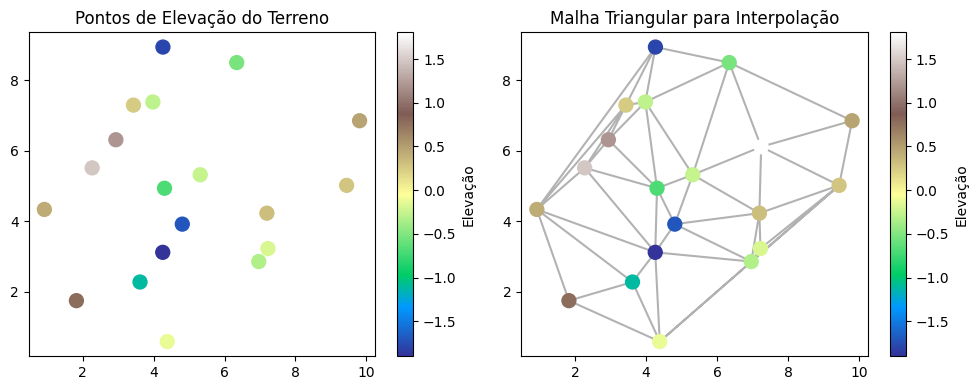

In [ ]:
# Simular dados de elevação
np.random.seed(123)
pontos_terreno = np.random.rand(20, 2) * 10
elevacao = np.sin(pontos_terreno[:, 0]) + np.cos(pontos_terreno[:, 1])

# Triangulação para interpolação
tri_terreno = Delaunay(pontos_terreno)

plt.figure(figsize=(10, 4))

# Pontos de elevação
plt.subplot(1, 2, 1)
scatter = plt.scatter(pontos_terreno[:, 0], pontos_terreno[:, 1],
                     c=elevacao, cmap='terrain', s=100)
plt.colorbar(scatter, label='Elevação')
plt.title("Pontos de Elevação do Terreno")

# Malha triangular
plt.subplot(1, 2, 2)
plt.triplot(pontos_terreno[:, 0], pontos_terreno[:, 1], tri_terreno.simplices, 'k-', alpha=0.3)
scatter = plt.scatter(pontos_terreno[:, 0], pontos_terreno[:, 1],
                     c=elevacao, cmap='terrain', s=100)
plt.colorbar(scatter, label='Elevação')
plt.title("Malha Triangular para Interpolação")

plt.tight_layout()
plt.show()


##	✅ Conclusão

O grafo gerado pela triangulação de Delaunay demonstra, na prática, como um conjunto de pontos pode ser conectado de forma eficiente e balanceada, respeitando princípios matemáticos que evitam ângulos agudos e garantem uma distribuição mais regular das conexões.

Essa propriedade torna a triangulação especialmente útil em contextos como modelagem geográfica, simulações numéricas e interpolação de superfícies.

Além de sua elegância teórica — com garantias de unicidade e estabilidade computacional — a triangulação de Delaunay se destaca como uma ferramenta essencial na engenharia e na computação aplicada.